# Fred aquisition data

In [3]:
import json
import matplotlib.pyplot as plt
import requests
import pandas as pd

In [4]:
# Load the secret api key
with open('api_cred.json', 'r') as f:
    secrets = json.load(f)

api_key = secrets['api_key'] # you can hardcode your value here if you want
api_key

'f677e7442d9b3235fd762f4cc97772c5'

### Some example without Pandas

In [18]:
seriesID = "UNRATE"   # Unemployment rate
start = "2015-01-01"  # start date
end = "2023-10-31"    # end date
units = "pc1"         # Percent change from a year ago

url = "https://api.stlouisfed.org/fred/series/observations" + \
      f"?series_id={seriesID}&api_key={api_key}&file_type=json" + \
      f"&observation_start={start}&observation_end={end}&units={units}"
print("url :", url)
response = requests.get(url)

# print the response
print("response :", (response))


url : https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&api_key=f677e7442d9b3235fd762f4cc97772c5&file_type=json&observation_start=2015-01-01&observation_end=2023-10-31&units=pc1
response : <Response [200]>


Here the response is <Response [200]> which means that the request was successful.
200 is the status code for a successful request.

In [7]:
# print the status code
print("status code :", response.status_code)

# print the content
print("content :", response.content)

status code : 200
content : b'{"realtime_start":"2024-02-29","realtime_end":"2024-02-29","observation_start":"2015-01-01","observation_end":"2023-10-31","units":"pc1","output_type":1,"file_type":"json","order_by":"observation_date","sort_order":"asc","count":106,"offset":0,"limit":100000,"observations":[{"realtime_start":"2024-02-29","realtime_end":"2024-02-29","date":"2015-01-01","value":"-13.63636"},{"realtime_start":"2024-02-29","realtime_end":"2024-02-29","date":"2015-02-01","value":"-17.91045"},{"realtime_start":"2024-02-29","realtime_end":"2024-02-29","date":"2015-03-01","value":"-19.40299"},{"realtime_start":"2024-02-29","realtime_end":"2024-02-29","date":"2015-04-01","value":"-12.90323"},{"realtime_start":"2024-02-29","realtime_end":"2024-02-29","date":"2015-05-01","value":"-11.11111"},{"realtime_start":"2024-02-29","realtime_end":"2024-02-29","date":"2015-06-01","value":"-13.11475"},{"realtime_start":"2024-02-29","realtime_end":"2024-02-29","date":"2015-07-01","value":"-16.129

Here the content is in byte format. 
We can decode it to utf-8 format.
But, as the reposnse is in json format, 
we can directly decode it to json format using the json() method from requests library

In [10]:
# print the json content
print("json content :", (response.json()))

json content : {'realtime_start': '2024-02-29', 'realtime_end': '2024-02-29', 'observation_start': '2015-01-01', 'observation_end': '2023-10-31', 'units': 'pc1', 'output_type': 1, 'file_type': 'json', 'order_by': 'observation_date', 'sort_order': 'asc', 'count': 106, 'offset': 0, 'limit': 100000, 'observations': [{'realtime_start': '2024-02-29', 'realtime_end': '2024-02-29', 'date': '2015-01-01', 'value': '-13.63636'}, {'realtime_start': '2024-02-29', 'realtime_end': '2024-02-29', 'date': '2015-02-01', 'value': '-17.91045'}, {'realtime_start': '2024-02-29', 'realtime_end': '2024-02-29', 'date': '2015-03-01', 'value': '-19.40299'}, {'realtime_start': '2024-02-29', 'realtime_end': '2024-02-29', 'date': '2015-04-01', 'value': '-12.90323'}, {'realtime_start': '2024-02-29', 'realtime_end': '2024-02-29', 'date': '2015-05-01', 'value': '-11.11111'}, {'realtime_start': '2024-02-29', 'realtime_end': '2024-02-29', 'date': '2015-06-01', 'value': '-13.11475'}, {'realtime_start': '2024-02-29', 'rea

The json response contains some keys like:
  - realtime_start
  - realtime_end
  - units
  ...
  - observations

The observations key contains the data we need.
The observation key contains a list of dictionaries. where two keys are interesting for us:
  - date, the date of the observation
  - value, the value of the observation

In [34]:
# TODO: Given the response in json format, extract a list made of tuples where the first element is the date as str type and the second element is the value as float type
# Hint: use list comprehension
# FRED API Observations DOC : https://fred.stlouisfed.org/docs/api/fred/series_observations.html
observations = (response.json())['observations']
print(type(observations))
data = [(observation["date"], float(observation["value"])) for observation in observations]
print("data :", (data))

<class 'list'>
data : [('2015-01-01', -13.63636), ('2015-02-01', -17.91045), ('2015-03-01', -19.40299), ('2015-04-01', -12.90323), ('2015-05-01', -11.11111), ('2015-06-01', -13.11475), ('2015-07-01', -16.12903), ('2015-08-01', -16.39344), ('2015-09-01', -15.25424), ('2015-10-01', -12.2807), ('2015-11-01', -12.06897), ('2015-12-01', -10.71429), ('2016-01-01', -15.78947), ('2016-02-01', -10.90909), ('2016-03-01', -7.40741), ('2016-04-01', -5.55556), ('2016-05-01', -14.28571), ('2016-06-01', -7.54717), ('2016-07-01', -7.69231), ('2016-08-01', -3.92157), ('2016-09-01', 0.0), ('2016-10-01', -2.0), ('2016-11-01', -7.84314), ('2016-12-01', -6.0), ('2017-01-01', -2.08333), ('2017-02-01', -6.12245), ('2017-03-01', -12.0), ('2017-04-01', -13.72549), ('2017-05-01', -8.33333), ('2017-06-01', -12.2449), ('2017-07-01', -10.41667), ('2017-08-01', -10.20408), ('2017-09-01', -14.0), ('2017-10-01', -14.28571), ('2017-11-01', -10.6383), ('2017-12-01', -12.76596), ('2018-01-01', -14.89362), ('2018-02-01',

In [101]:
# data2 = [{"date": observation["date"], "value": float(observation["value"])} for observation in observations]
df = pd.DataFrame(observations).loc[:, ["date", "value"]]
# df.value = df.value.map(lambda v: float(v))
df.value = df.value.astype(float)
df.info()
df.describe()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    106 non-null    object 
 1   value   106 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


,date,value
0,2015-01-01,-13.63636
1,2015-02-01,-17.91045
2,2015-03-01,-19.40299
3,2015-04-01,-12.90323
4,2015-05-01,-11.11111
...,...,...
101,2023-06-01,0.00000
102,2023-07-01,0.00000
103,2023-08-01,5.55556
104,2023-09-01,8.57143


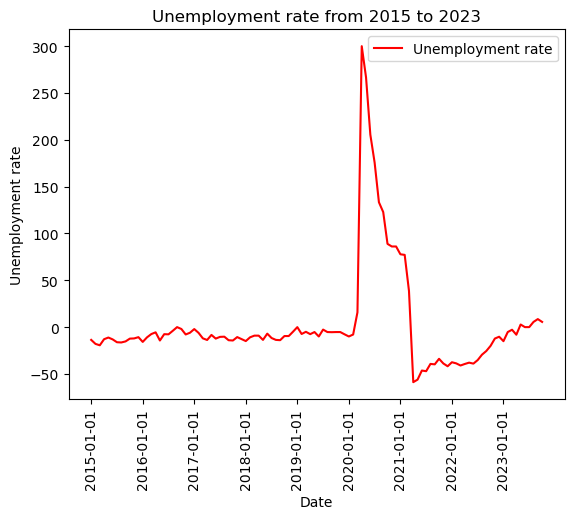

In [50]:
# Plotting the data
# TODO: plot the data, you need to create the same plot as the one following
plt.title("Unemployment rate from 2015 to 2023")
x = [x[0] for x in data]
y = [y[1] for y in data]
plt.plot(x, y, "r", label="Unemployment rate")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Unemployment rate")
plt.xticks(x[::12], rotation=90)
plt.show()

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

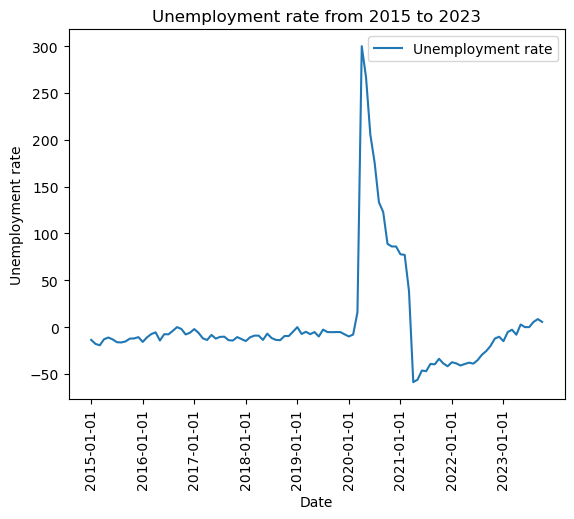

In [33]:
from example_plot import example_plot
x = [x[0] for x in data]
y = [y[1] for y in data]
example_plot(x, y, u"Unemployment rate")
# I changed the plt.xticks to display only one date per year and changed the reotation to 90degree

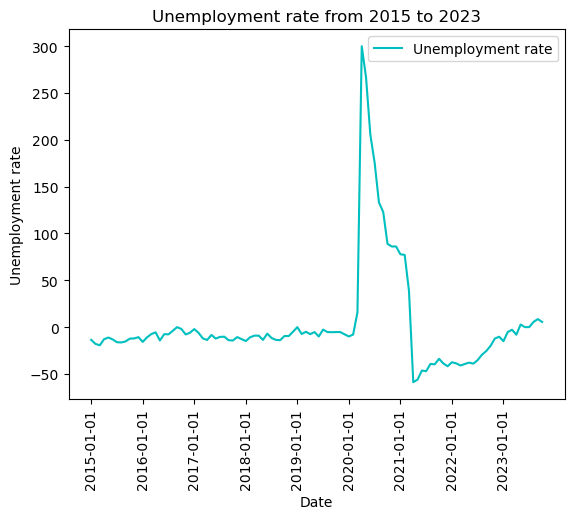

In [91]:
plt.title("Unemployment rate from 2015 to 2023")
plt.plot(df["date"], df.value, "c", label="Unemployment rate")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Unemployment rate")
plt.xticks(df.date[::12], rotation=90)
plt.show()

# Part 2: two plots
In this part you are required to make one chart with two plots, one for the `GDP` and one for the `UNRATE`.

This tie you are asked to make the API calls by yourself (you can inspire yourself from the previous part). You can keep the same start and end date, but the seriesID should be different (`GDP` and `UNRATE` respectivelly). The units also differs:
- for `GDP` the units would be `pc1`
- for `UNRATE` the units would be `lin`

Once you have the data you should plot the inside the same chart. You'll use the same values for `X` and the `Y` values will differs for the two plots.

In [73]:
url_gdp = "https://api.stlouisfed.org/fred/series/observations" + \
      f"?series_id=GDP&api_key={api_key}&file_type=json" + \
      f"&observation_start={start}&observation_end={end}&units=pc1"
url_unrate = "https://api.stlouisfed.org/fred/series/observations" + \
      f"?series_id=UNRATE&api_key={api_key}&file_type=json" + \
      f"&observation_start={start}&observation_end={end}&units=lin"

gdp = [(g["date"], float(g["value"])) for g in requests.get(url_gdp).json()["observations"]]
unrate = [(u["date"], float(u["value"])) for u in requests.get(url_unrate).json()["observations"]]

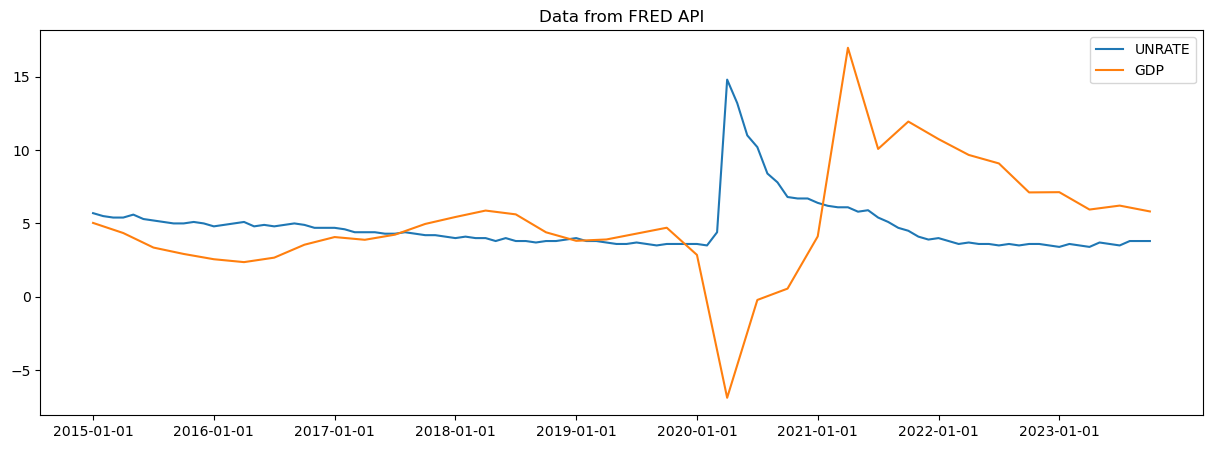

In [74]:
plt.figure(figsize = (15, 5))

unrate_x = [x[0] for x in unrate]
unrate_y = [y[1] for y in unrate]
plt.plot(unrate_x, unrate_y, label="UNRATE")

gdp_x = [x[0] for x in gdp]
gdp_y = [y[1] for y in gdp]
plt.plot(gdp_x, gdp_y, label="GDP")

plt.legend()
plt.title("Data from FRED API")
plt.xticks(unrate_x[::12])

plt.show()